# BTC : Historical Prices

## Data source loading

In [1]:
import pandas as pd
import numpy as np

# Viz
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Stats
import statsmodels.api as sm
from pylab import rcParams

In [2]:
btc_yahoo = pd.read_csv('/home/giujorge/datalake/lab/Crypto/crypto/data/external/yahoo/daily/usd/BTC-USD.csv', parse_dates=True, index_col=0)
btc_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
btc_yahoo.shape

(2546, 6)

In [5]:
btc_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2546 entries, 2014-09-17 to 2021-09-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2542 non-null   float64
 1   High       2542 non-null   float64
 2   Low        2542 non-null   float64
 3   Close      2542 non-null   float64
 4   Adj Close  2542 non-null   float64
 5   Volume     2542 non-null   float64
dtypes: float64(6)
memory usage: 139.2 KB


## Missing Values

In [8]:
btc_yahoo.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [10]:
btc_yahoo[btc_yahoo['Open'].isnull()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

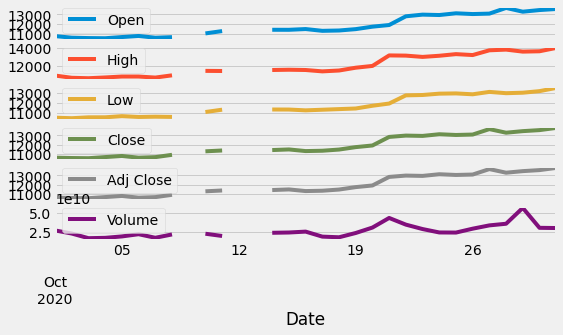

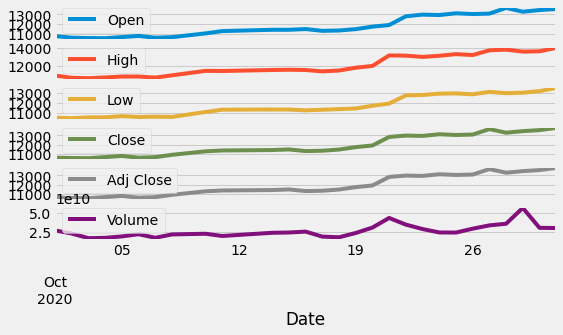

In [34]:
btc_yahoo.loc['2020-10'].plot(subplots=True, figsize=(8, 4))
btc_yahoo.loc['2020-10'].interpolate().plot(subplots=True, figsize=(8, 4))

In [35]:
btc_yahoo.interpolate(inplace=True)

In [41]:
btc_yahoo.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Descriptive Statistics

In [37]:
btc_yahoo.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2.546000e+03
mean,8772.057808,9022.047316,8502.551463,8791.041772,8791.041772,1.337391e+10
std,12926.973156,13322.204395,12481.796765,12950.946659,12950.946659,1.979516e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,574.170258,578.549500,569.250733,574.395996,574.395996,7.280068e+07
50%,5231.624512,5334.257080,5097.202637,5236.999024,5236.999024,4.345096e+09
75%,9526.624756,9701.644776,9325.418213,9526.807861,9526.807861,2.112313e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


## Visualization

### Plotting Lines

In [44]:
fig = go.Figure([go.Scatter(x=btc_yahoo.index, y=btc_yahoo['Adj Close'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='BTC : Historical Prices',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Adj Close")
fig.show()